In [2]:
import os
import pickle

import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape,GlobalAveragePooling2D
from keras.models import Model, load_model
from keras import backend as K
from keras import losses
from keras.layers.normalization import BatchNormalization

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
X_train_labelled = pickle.load(open("./"+'BP_61'+"/X_train_labelled.pkl", "rb"))
y_train_labelled = pickle.load(open("./"+'BP_61'+"/y_train_labelled.pkl", "rb"))

X_test_labelled = pickle.load(open("./"+'BP_61'+"/X_test_labelled.pkl", "rb"))
y_test_labelled = pickle.load(open("./"+'BP_61'+"/y_test_labelled.pkl", "rb"))

In [4]:
X_train_labelled=X_train_labelled.astype('float32')
X_test_labelled=X_test_labelled.astype('float32')

In [5]:
X_train_labelled.shape

(1000, 48, 48, 1)

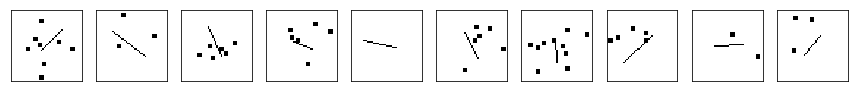

In [6]:
#部分显示图片
n = 10 # how many digits we will display
plt.figure(figsize=(15, 15))
for i in range(n):
    # display original
    #ax = plt.subplot(2, n, i + 1)
    ax=plt.subplot(1, 10, i+1)
    plt.imshow(X_train_labelled[i].reshape(48,48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [7]:
import cv2
X_train = [cv2.cvtColor(cv2.resize(i, (48, 48)), cv2.COLOR_GRAY2RGB) for i in X_train_labelled]
X_test=[cv2.cvtColor(cv2.resize(i, (48, 48)), cv2.COLOR_GRAY2RGB)
           for i in X_test_labelled]

In [6]:
import cv2
X_train_labelled = [cv2.cvtColor(cv2.resize(X_train_labelled[10], (48, 48)), cv2.COLOR_GRAY2RGB)]

In [7]:
X_train_labelled[0].shape

(48, 48, 3)

In [9]:
X_train=np.array(X_train)

In [10]:
X_train.shape

(1000, 48, 48, 3)

In [10]:
X_train = np.concatenate([arr[np.newaxis] for arr in X_train]).astype('float32')
X_test = np.concatenate([arr[np.newaxis] for arr in X_test]).astype('float32')

In [11]:
X_train.shape

(1000, 48, 48, 3)

In [12]:
X_test.shape

(1000, 48, 48, 3)

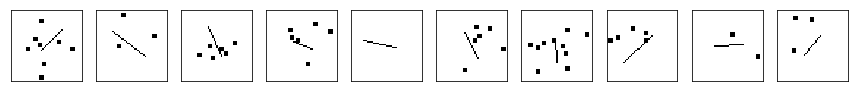

In [13]:
#部分显示图片
n = 10 # how many digits we will display
plt.figure(figsize=(15, 15))
for i in range(n):
    # display original
    #ax = plt.subplot(2, n, i + 1)
    ax=plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

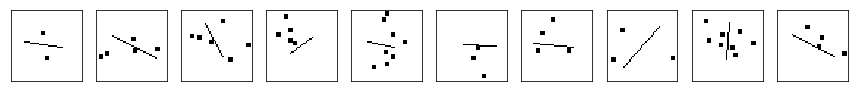

In [14]:
#部分显示图片
n = 10 # how many digits we will display
plt.figure(figsize=(15, 15))
for i in range(n):
    # display original
    #ax = plt.subplot(2, n, i + 1)
    ax=plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [15]:
from keras.utils import to_categorical
y_train = to_categorical(y_train_labelled)
y_test = to_categorical(y_test_labelled)

In [16]:
y_train[:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [17]:
y_test[:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [18]:
y_train.shape

(1000, 2)

In [19]:
vgg16_model = VGG16(weights = 'imagenet', include_top = False)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation = 'softmax')(x)
model = Model(input = vgg16_model.input, output = predictions)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [20]:
model.summary( )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [21]:
# freeze all layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

In [22]:
model.summary( )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [23]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [24]:
# fit the model, log the results and the training time
transfer_learning_history = model.fit(
    X_train,y_train,
    epochs =32,
    batch_size=32)

Epoch 1/32
1000/1000 [==============================] - 1s 1ms/step - loss: 0.7218 - acc: 0.5210
Epoch 2/32
1000/1000 [==============================] - 0s 298us/step - loss: 0.6650 - acc: 0.5720
Epoch 3/32
1000/1000 [==============================] - 0s 299us/step - loss: 0.6475 - acc: 0.6050
Epoch 4/32
1000/1000 [==============================] - 0s 298us/step - loss: 0.6329 - acc: 0.6500
Epoch 5/32
1000/1000 [==============================] - 0s 298us/step - loss: 0.6157 - acc: 0.6350
Epoch 6/32
1000/1000 [==============================] - 0s 298us/step - loss: 0.6030 - acc: 0.6510
Epoch 7/32
1000/1000 [==============================] - 0s 297us/step - loss: 0.5783 - acc: 0.6770
Epoch 8/32
1000/1000 [==============================] - 0s 298us/step - loss: 0.5873 - acc: 0.6690
Epoch 9/32
1000/1000 [==============================] - 0s 298us/step - loss: 0.5639 - acc: 0.6660
Epoch 10/32
1000/1000 [==============================] - 0s 298us/step - loss: 0.5532 - acc: 0.6950
Epoch 11/32

In [25]:
test_eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6192557480335236
Test accuracy: 0.669
